# 维纳滤波的缺点

维纳滤波（Wiener Filter）是一种经典的图像复原算法，在已知信号和噪声特性时，可以得到最佳的复原效果。然而，维纳滤波存在一个重要的限制，即它要求**输入图像的功率谱**和**噪声功率谱**为已知。这种限制在实际应用中可能难以满足。例如在老照片修复等场景中，我们往往难以获得这些先验信息，从而导致维纳滤波难以有效应用。

在理论上，维纳滤波通过最小化输出的均方误差（MSE）来估计未知的退化系统 $H(u, v)$。给定退化图像 $G(u, v)$ 和先验的功率谱信息，维纳滤波通过如下公式恢复原图 $F(u, v)$：

$$
\hat{F}(u, v) = \frac{H^*(u, v)}{|H(u, v)|^2 + \frac{S_N(u, v)}{S_F(u, v)}} G(u, v)
$$

其中 $S_N(u, v)$ 和 $S_F(u, v)$ 分别是噪声和图像的功率谱。

维纳滤波需要完整的噪声和图像功率谱信息，而在许多实际应用中，这些信息并不总是可用。因此，后续的研究者提出了一种不需要精确先验功率谱信息的**约束最小二乘滤波（Constrained Least Squares Filtering, CLSF）**方法。该方法通过平滑性约束来复原图像，能够在缺少完整先验信息的情况下得到更稳定的复原效果。

# 约束最小二乘滤波

约束最小二乘滤波（CLSF）是一种在复原过程中加入平滑性约束的图像复原方法。与维纳滤波不同，CLSF 不依赖精确的功率谱先验信息，而是通过引入平滑性正则化项，避免过度拟合。CLSF 的基础模型可描述如下：

$$
G(u, v) = H(u, v) F(u, v) + N(u, v)
$$

其中，$G(u, v)$ 是退化后的图像，$H(u, v)$ 是退化系统，$F(u, v)$ 是原始图像，$N(u, v)$ 是噪声。CLSF 的目标是找到一个最佳的 $H(u, v)$，使得还原后的图像尽可能接近原图像。不同于维纳滤波，CLSF 仅依赖图像的平滑性约束和正则化参数来复原图像。

## 最小二乘目标函数

在约束最小二乘滤波中，我们通过最小化误差平方和来估计退化系统 $H(u, v)$。对于给定的观测结果 $G(u, v)$ 和退化系统 $H(u, v)$，我们可以构建如下的目标函数：

$$
E = \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} |G(u, v) - H(u, v) F(u, v)|^2
$$

我们的目标是找到一个 $H(u, v)$，使得 $E$ 最小化，从而得到更接近原始图像的恢复效果。

## 约束条件

为了防止 $H(u, v)$ 变得过于复杂，导致复原结果的过度拟合，我们引入平滑性约束。常见的平滑性约束是加入一个**拉普拉斯算子** $P(u, v)$，以控制 $H(u, v)$ 的平滑度：

$$
\min_{H(u, v)} E = \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} |G(u, v) - H(u, v) F(u, v)|^2 + \lambda \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} |P(u, v) \cdot H(u, v)|^2
$$

其中，$P(u, v)$ 是拉普拉斯算子，用于对 $H(u, v)$ 进行平滑约束，$\lambda$ 是控制平滑强度的正则化参数。通过引入平滑项，我们可以控制复原结果的复杂度，避免过度拟合。

## 拉格朗日乘子法的应用

我们可以通过拉格朗日乘子法来求解这个优化问题。为此，我们构造如下的拉格朗日函数：

$$
L(H, \lambda) = \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} |G(u, v) - H(u, v) F(u, v)|^2 + \lambda \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} |P(u, v) \cdot H(u, v)|^2
$$

其中 $\lambda$ 是拉格朗日乘子，用于平衡复原误差和滤波器的平滑性。对 $L(H, \lambda)$ 关于 $H(u, v)$ 求偏导并设为 0，可以得到如下方程：

$$
\frac{\partial L}{\partial H(u, v)} = -2F(u, v)(G(u, v) - H(u, v)F(u, v)) + 2\lambda P(u, v)^2 H(u, v) = 0
$$

这个方程表示在带有正则化的条件下，$H(u, v)$ 应该满足的平衡条件。

## 矩阵形式

我们可以将上述方程写成矩阵形式以简化求解过程。假设 $H$ 是 $H(u, v)$ 的列向量形式，我们可以将优化问题写成：

$$
(A^T A + \lambda (P^T P)) \mathbf{h} = A^T \mathbf{g}
$$

其中：
- $A$ 是退化系统 $H(u, v)$ 对应的矩阵形式。
- $P$ 是拉普拉斯算子的矩阵表示。
- $\mathbf{g}$ 是退化图像 $G(u, v)$ 的列向量形式。
- $\mathbf{h}$ 是待求解的退化系统向量。

通过求解这个矩阵方程，我们可以得到最优的 $\mathbf{h}$，即最优的 $H(u, v)$。随后，我们可以使用该 $H(u, v)$ 对退化图像进行复原。

## 修复后的图像恢复

通过求解得到的 $H(u, v)$，我们可以得到复原图像的频域表达式：

$$
F_{restored}(u, v) = \frac{G(u, v)}{H(u, v)}
$$

其中 $F_{restored}(u, v)$ 是复原后的图像，$\mathcal{F}^{-1}$ 表示傅里叶逆变换，用于将频域结果转换回空域。

### 正则化的改进

在实际应用中，为了避免 $H(u, v)$ 变得过于复杂，导致复原结果的不稳定性，我们可以使用正则化技术（如 Tikhonov 正则化）来控制模型的复杂度。通过加入 Tikhonov 正则化项，优化目标可以改写为：

$$
\min_{H(u, v)} E = \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} |G(u, v) - H(u, v) F(u, v)|^2 + \lambda \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} |H(u, v)|^2
$$

这可以进一步简化成矩阵形式：

$$
(A^T A + \lambda I) \mathbf{h} = A^T \mathbf{g}
$$

其中 $\lambda$ 是正则化参数，用于平衡模型复杂度和拟合误差。通过引入正则化项，我们可以有效控制复原的平滑度，避免过度拟合。

## 总结

约束最小二乘滤波是一种强大的图像复原技术。相比于维纳滤波，约束最小二乘滤波只依赖于图像的平滑性约束和正则化项，不需要精确的先验功率谱信息，因此更具实用性。CLSF 能够在噪声和退化模型不确定的情况下，基于平滑性和正则化约束，提供一个稳定的图像复原结果。它的目标是通过优化一个带有正则化项的误差函数，在噪声条件下还原

退化图像。

约束最小二乘滤波特别适合处理复杂、不确定的退化图像，在图像增强和修复任务中展现出优越的性能。


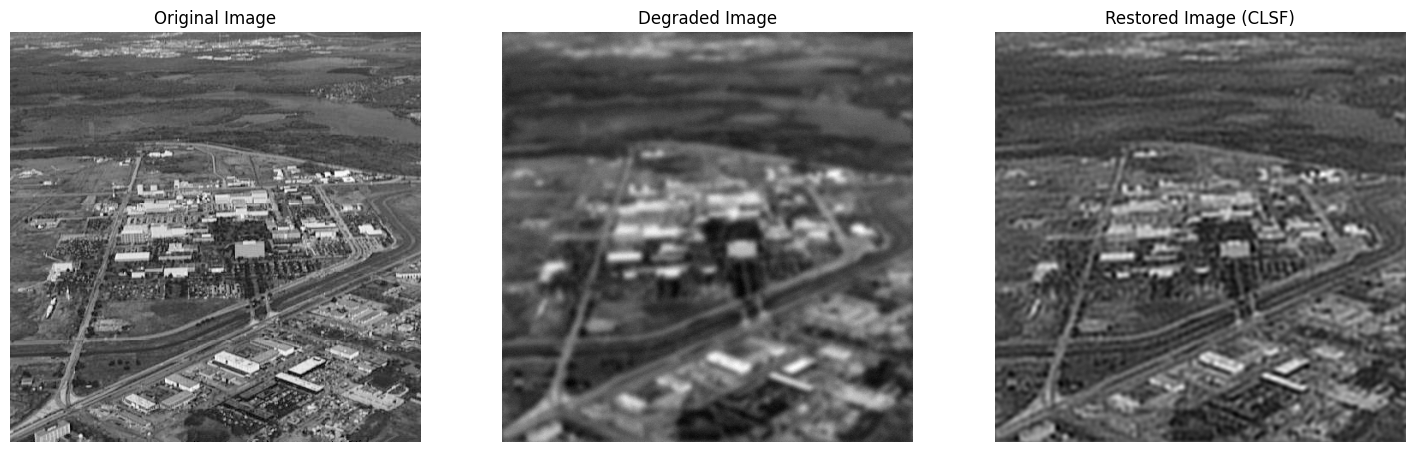

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fftshift, ifftshift, fft2, ifft2

def gaussian_kernel(size, sigma):
    """生成高斯模糊核"""
    ax = np.arange(-size // 2 + 1., size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    return kernel / np.sum(kernel)

def apply_degradation(img, kernel, noise_level=0.01):
    """对图像应用模糊核和噪声，得到退化图像"""
    img_dft = fft2(img)
    kernel_padded = np.zeros_like(img)
    k_center = kernel.shape[0] // 2
    kernel_padded[:kernel.shape[0], :kernel.shape[1]] = kernel
    kernel_padded = np.roll(kernel_padded, -k_center, axis=(0, 1))
    kernel_dft = fft2(kernel_padded)
    
    # 应用退化
    degraded_dft = img_dft * kernel_dft
    degraded_img = np.abs(ifft2(degraded_dft))
    
    # 添加噪声
    noise = noise_level * np.random.normal(0, 1, img.shape)
    degraded_img += noise
    return degraded_img, kernel_dft

def laplacian_operator(shape):
    """生成拉普拉斯算子，用于平滑约束"""
    laplacian = np.zeros(shape)
    laplacian[0, 0] = 4
    laplacian[0, 1] = laplacian[1, 0] = laplacian[0, -1] = laplacian[-1, 0] = -1
    return fft2(laplacian)

def constrained_least_squares_filter(g, kernel_dft, lambd, laplacian_dft):
    """约束最小二乘滤波"""
    G = fft2(g)
    H_conj = np.conj(kernel_dft)
    denominator = (np.abs(kernel_dft)**2 + lambd * np.abs(laplacian_dft)**2)
    F_hat = (H_conj * G) / denominator
    f_restored = np.abs(ifft2(F_hat))
    return f_restored

def normalize(img):
    """将图像归一化到 [0, 255]"""
    img = img - np.min(img)
    img = img / np.max(img)
    return (img * 255).astype(np.uint8)

# 主函数
if __name__ == "__main__":
    import os

    # 读取灰度图像
    BASE_DIR = "/opt/images/DIPRawImageDataset/DIP3E_CH05_Original_Images/DIP3E_CH05_Original_Images"
    img = cv2.imread(os.path.join(BASE_DIR, "Fig0525(a)(aerial_view_no_turb).tif"), cv2.IMREAD_GRAYSCALE)
    img = img / 255.0  # 归一化到 [0, 1]
    
    # 生成退化图像
    kernel_size = 15
    sigma = 3
    kernel = gaussian_kernel(kernel_size, sigma)
    degraded_img, kernel_dft = apply_degradation(img, kernel, noise_level=0.01)
    
    # 生成拉普拉斯算子
    laplacian_dft = laplacian_operator(img.shape)
    
    # 约束最小二乘滤波复原
    lambd = 0.01  # 正则化参数
    restored_img = constrained_least_squares_filter(degraded_img, kernel_dft, lambd, laplacian_dft)
    
    # 显示结果
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    axes[0].imshow(normalize(img), cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(normalize(degraded_img), cmap='gray')
    axes[1].set_title('Degraded Image')
    axes[1].axis('off')

    axes[2].imshow(normalize(restored_img), cmap='gray')
    axes[2].set_title('Restored Image (CLSF)')
    axes[2].axis('off')

    plt.show()
